In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,cross_validation,svm
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
scaler = False
from scipy.stats import skew

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import time, datetime
import warnings
warnings.filterwarnings("ignore")

style.use('ggplot')

/home/ayrus/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Feature Engineering

### Survived:


0    549
1    342
Name: Survived, dtype: int64


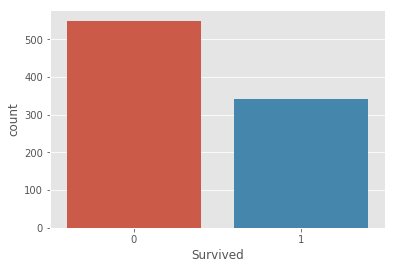

In [4]:
print(df['Survived'].value_counts())
sns.countplot('Survived',data=df)

### How many males and females survived?

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


[]

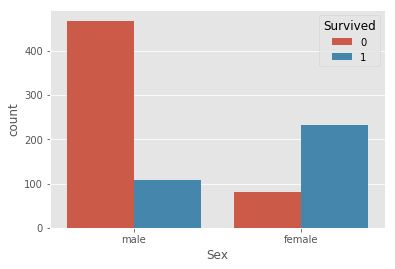

In [5]:
print (df.groupby(['Sex','Survived'])['Survived'].count())
sns.countplot(x="Sex", hue="Survived", data=df)
plt.plot()

### Age

In [6]:
print('Max age: ' + str(df['Age'].max()))
print('Min age: ' + str(df['Age'].min()))
print('average age: ' + str(df['Age'].mean()))

Max age: 80.0
Min age: 0.42
average age: 29.69911764705882


The skewness of data is:  0.3882898514698657


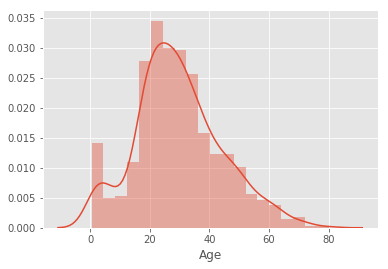

In [7]:
df['Age'].isnull()
df['Age'].fillna(df['Age'].median())
sns.distplot(df['Age'].dropna())
print('The skewness of data is: ',skew(np.array(df['Age'].dropna())))

Age data is positively skewed with skewness of 0.3882+<br>
I will try to drop it to zero.

In [8]:
p  =  df[df['Age'].isnull()]

### Fare

In [9]:
print('Max fare: ' + str(df['Fare'].max()))
print('Min min: ' + str(df['Fare'].min()))
print('average fare: ' + str(df['Fare'].mean()))
df['Fare'].describe()

Max fare: 512.3292
Min min: 0.0
average fare: 32.2042079685746


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The skewness of data is:  4.7792532923723545


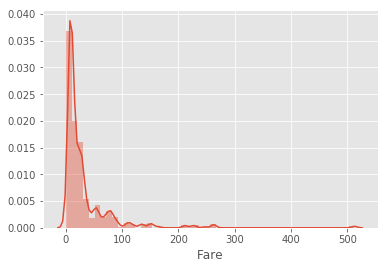

In [10]:
df['Fare'].isnull()
df['Fare'].fillna(df['Fare'].median())
sns.distplot(df['Fare'].dropna())
print('The skewness of data is: ',skew(np.array(df['Fare'].dropna())))

In [11]:
t = df[df['Fare']>250][df['Survived']==1]
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


[]

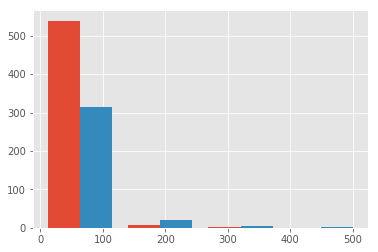

In [12]:
fare_sur = df['Fare'][df['Survived']==1]
fare_non_sur = df['Fare'][df['Survived']==0]
plt.hist([fare_non_sur,fare_sur],bins = 4)
plt.plot()

### SibSp
sibsp: The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)

In [13]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

[]

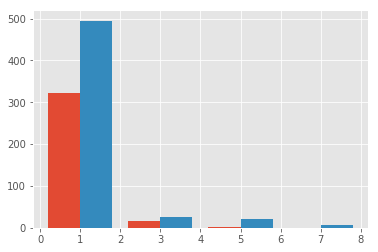

In [14]:
sib_sur = df['SibSp'][df['Survived']==1]
sib_non_sur = df['SibSp'][df['Survived']==0]
plt.hist([sib_sur,sib_non_sur],bins = 4)
plt.plot()

### Parch
**parch**: The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

In [15]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64


[]

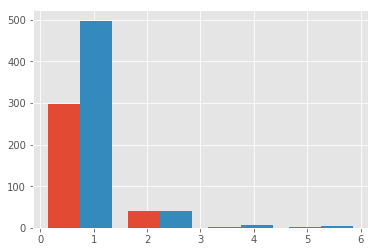

In [20]:
print (df.groupby(['Parch','Survived'])['Survived'].count())
parch_sur = df['Parch'][df['Survived']==1]
parch_non_sur = df['Parch'][df['Survived']==0]
plt.hist([parch_sur,parch_non_sur],bins = 4)
plt.plot()

### Pclass
Ticket class<br>
1 = 1st <br>
2 = 2nd <br>
3 = 3rd <br>

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


[]

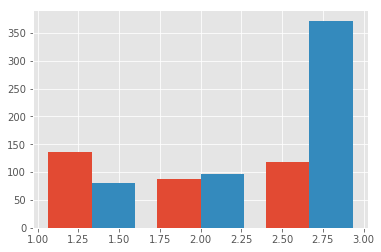

In [19]:
print (df.groupby(['Pclass','Survived'])['Survived'].count())
Pclass_sur = df['Pclass'][df['Survived']==1]
Pclass_non_sur = df['Pclass'][df['Survived']==0]
plt.hist([Pclass_sur,Pclass_non_sur],bins = 3)
plt.plot()

### Embarked
Port of Embarkation	
C = Cherbourg<br>
Q = Queenstown<br>
S = Southampton

In [23]:
print (df.groupby(['Embarked','Survived'])['Survived'].count())
Emb_sur = df['Embarked'][df['Survived']==1]
Emb_non_sur = df['Embarked'][df['Survived']==0]
plt.hist([Emb_sur,Emb_non_sur],bins = 3)
plt.plot()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64


ValueError: setting an array element with a sequence

AttributeError: 'NoneType' object has no attribute 'seq'

In [ ]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [7]:
#Linear Support Vector Machine(linear-SVM)
score = 0
for i in range(100):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)
    clf = svm.SVC(C=4,gamma=.1)
    clf = clf.fit(X_train, y_train)
    clf.fit(X_train,y_train)
    score += clf.score(X_test,y_test)
print(score)

82.312849162


In [8]:
#Radial Support Vector Machines(rbf-SVM)
clf = svm.SVC(kernel='rbf',C=4,gamma=.1)
clf = clf.fit(X_train, y_train)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.86033519553072624

In [9]:
#Logistic Regression

clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.83240223463687146

In [10]:
#decision tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.78770949720670391

In [11]:
#GradientBoosting
clf = GradientBoostingRegressor()
clf = clf.fit(X_train, y_train)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.49459832321628883

In [12]:
#K-Nearest Neighbours(KNN)
clf = KNeighborsClassifier(n_neighbors=2)
clf = clf.fit(X_train, y_train)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.81564245810055869

In [13]:
#Gaussian Naive Bayes
clf = GaussianNB()
clf = clf.fit(X_train, y_train)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.82681564245810057

In [14]:
def get_output():  
    clf = svm.SVC(kernel='rbf',C=4,gamma=0.05)
    X,y = training_data()
    clf = clf.fit(X,y)
    clf.fit(X_train,y_train)
    out = pd.DataFrame({'PassengerId':[i for i in range(892,1310)]})
    out['Survived'] = clf.predict(testing_data())
    out.set_index('PassengerId',inplace=True)
    out.to_csv('out.csv')
    print(out)

In [15]:
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.)
clf = svm.SVC(kernel='rbf',C=4,gamma=.1)
clf = clf.fit(X, y)


df = pd.read_csv('test.csv')
X = df[['Pclass','Sex','SibSp','Parch','Fare','Age','Embarked']]
X=X.fillna(0)
X.loc[X['Sex']=='female','Sex']=1
X.loc[X['Sex']=='male','Sex']=0
X.loc[X['Embarked']=='S','Embarked']=-1
X.loc[X['Embarked']=='C','Embarked']=0
X.loc[X['Embarked']=='Q','Embarked']=1

print(X.head())

X_test = preprocessing.scale(X)
# scaler = preprocessing.StandardScaler().fit(X)
# X_test = scaler.transform(X)

out = pd.DataFrame({'PassengerId':[i for i in range(892,1310)]})
clf.fit(X_train,y_train)
#clf.score(X_test,y_test)
out['Survived'] = clf.predict(X_test)
out.set_index('PassengerId',inplace=True)
out.to_csv('out.csv')
# print(out)

   Pclass Sex  SibSp  Parch     Fare   Age Embarked
0       3   0      0      0   7.8292  34.5        1
1       3   1      1      0   7.0000  47.0       -1
2       2   0      0      0   9.6875  62.0        1
3       3   0      0      0   8.6625  27.0       -1
4       3   1      1      1  12.2875  22.0       -1
